In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
%matplotlib notebook
data = pd.read_csv('Social_Network_Ads.csv')
X = data.iloc[:,2:-1].values
Y = data.iloc[:, -1].values
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
X_train, X_test, Y_train, Y_test = tts(X,Y,test_size = 0.2, random_state = 0)

In [3]:
from sklearn.preprocessing import StandardScaler
# it will transform data such that its distribution will have a mean value 0 and standard deviation of 1.
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.fit_transform(X_test)

C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
from sklearn.ensemble import RandomForestClassifier
# criterion -> function to measure quality of split
#entropy -> information gain
model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [5]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[53  5]
 [ 1 21]]


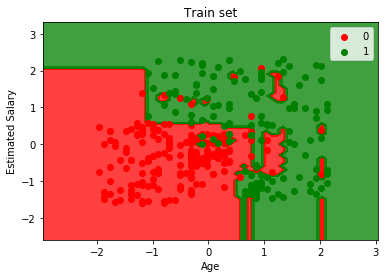

In [6]:
#I have copied the template from superdatascience.com/machine-learning/
# The idea is to predict for each pixel and color accrodingly
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
#CAUTION : decreasing steps here may lead to MemoryError/ System Hang
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Train set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()  # To show help at Top-right 
plt.show()

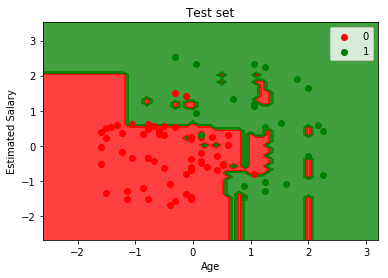

In [7]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
#CAUTION : decreasing steps here may lead to MemoryError/ System Hang
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Test set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()  # To show help at Top-right 
plt.show()